# Data Analysis of the House Prices datasets

In this notebook, we are going to to analyse the different variables of the House Prices Daset from the Kaggle Competition: [House Prices: Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

In [30]:
# To handle datasets
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt

# To display missing values
import missingno as msno


# To display only a limited number of columns of the dataframe in the whole notebook
pd.options.display.max_rows = 20

## Load data

In [5]:
train = pd.read_csv(filepath_or_buffer='../datasets/inputs/train.csv')
test = pd.read_csv(filepath_or_buffer='../datasets/inputs/test.csv')
sample_submission = pd.read_csv(filepath_or_buffer='../datasets/inputs/sample_submission.csv')

In [6]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
for col in train.columns:
    if col not in test.columns:
        print(f'The column {col} is in the train but not in the test set')

The column SalePrice is in the train but not in the test set


In [9]:
sample_submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [10]:
print(f'Training data shape: ', train.shape)
print(f'Testing data shape: ', test.shape)
print(f'Sample submission data shape: ', sample_submission.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)
Sample submission data shape:  (1459, 2)


### Description of the data

We have:

1. A training set with 81 columns: **`Id` + 79 variales + target (`Sale Price`)**
2. A testing set with 80:**`Id` + 79 variables**
3. A sample submission with:
    - `Id`
    - The predicted value for this `Id`

***Note:***

The training and testing set have a relativeley equal number of rows but are different data (there ids differ)

In the following analysis we are going to work on the training set exclusively.

For this, we are going to rename `train` to `data`

In [11]:
data = train

## Analysis of the variables

In [12]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Observations

- Some variables contain **missing values**
- Variables are of three types: float64, int64, object

Intuitively, `float64` and `object` are respectively **numerical** and **categorical**.

What about `int64`?

For instance, if we consider the `int64` variable: `LotArea`...

In [17]:
data['LotArea'].head(10)

0     8450
1     9600
2    11250
3     9550
4    14260
5    14115
6    10084
7    10382
8     6120
9     7420
Name: LotArea, dtype: int64

... it takes discreate Integer values. We can consider it a **numerical variables**

On the other hand, if we take the variable `OverallQual`, we just get to read the [description](../datasets/inputs/data_description): 
<hr>

```
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

```

<hr>

... to figure out that it is **categorical**






### Conclusion:

We need to consider the variables one by one to categorize them. We will do that later.

## Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

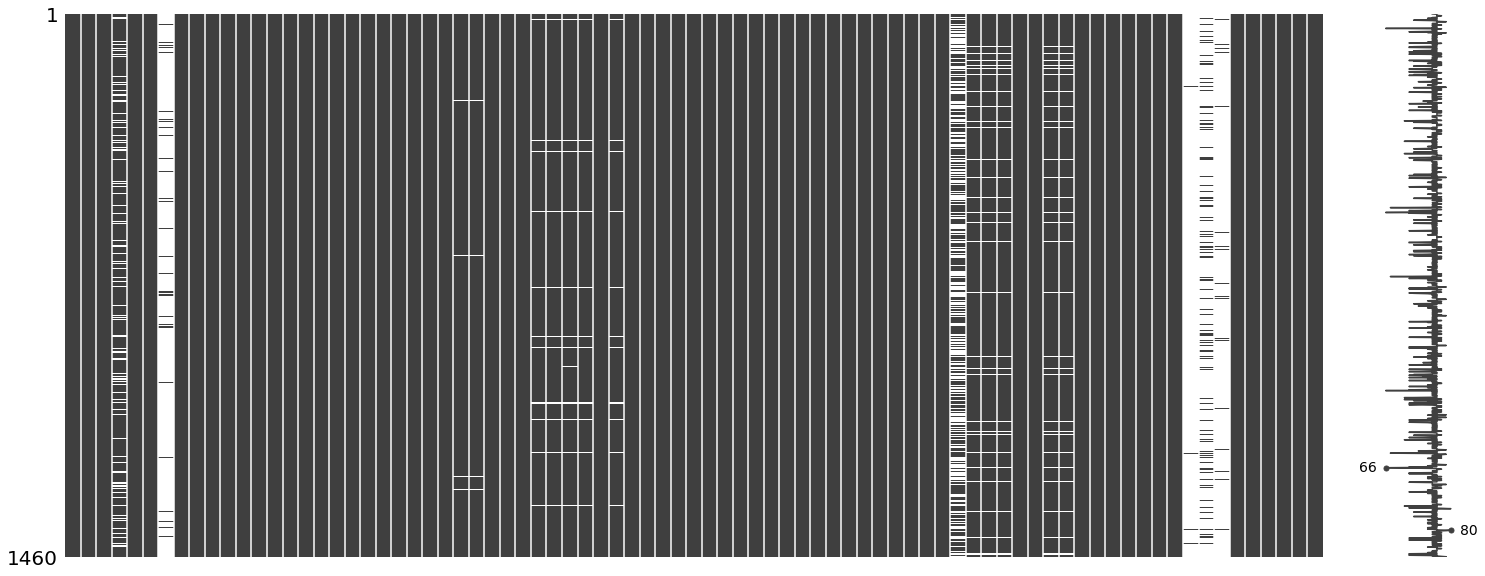

In [21]:
msno.matrix(data)

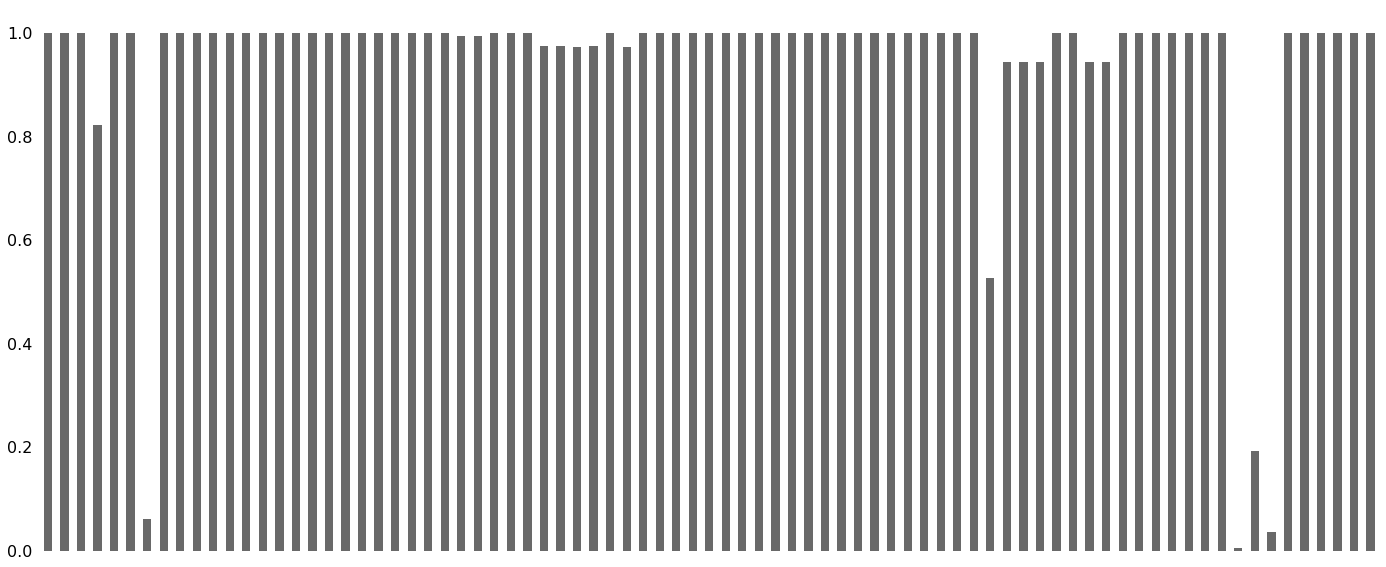

In [24]:
msno.bar(data)

### Observations

- Most columns seem to be complete
- 4 seem to be almost full of missing values
- 1/2 seems roughly halfly made of missing values
- The other columns with missing values seem to share these missing values for certain rows only

Let's try to find out the influence of missing value on the taget variable.

For this, we will compare:
- the median
- the average <br>
of `SalePrices`, when:
- The data is missing
- The data is not missing


#### Relationship between values being missing and Sale Price

Let's evaluate the price of the house in those observations where the information is missing, for each variable.

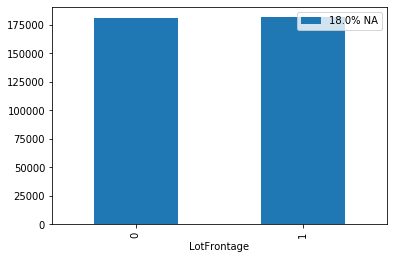

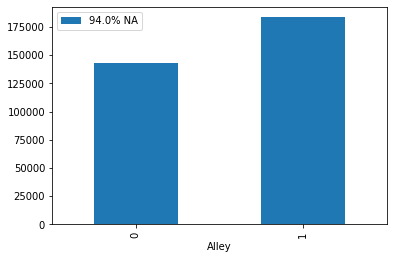

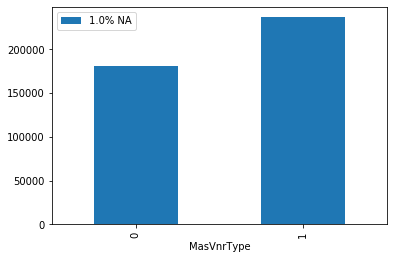

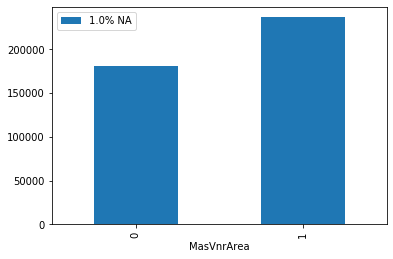

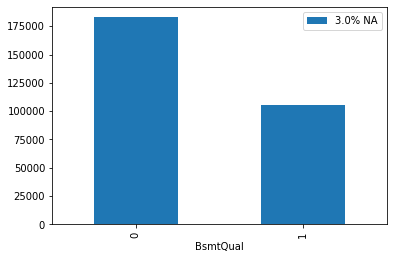

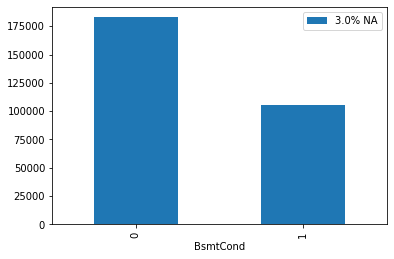

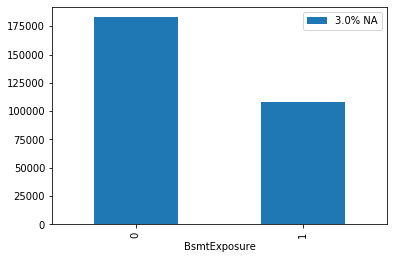

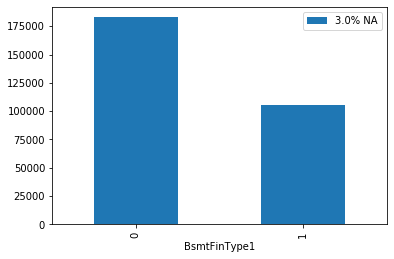

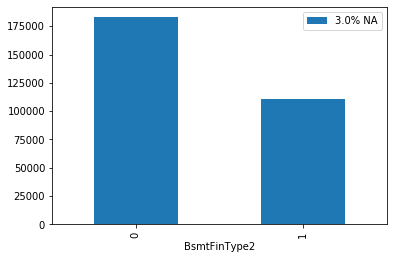

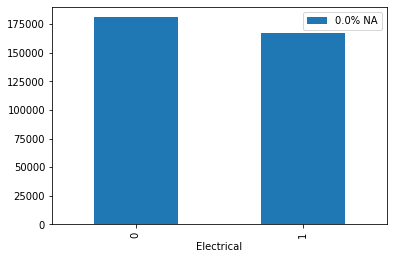

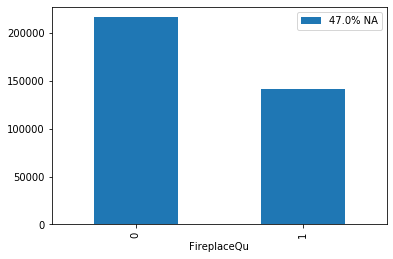

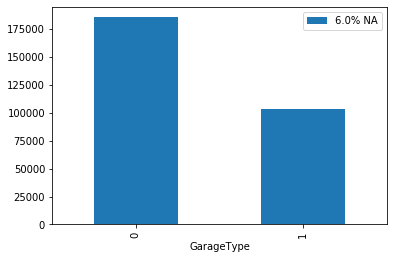

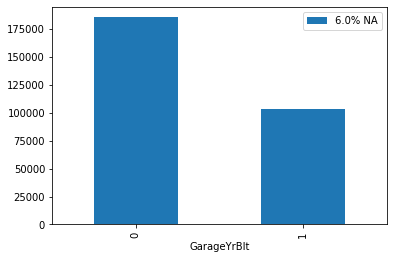

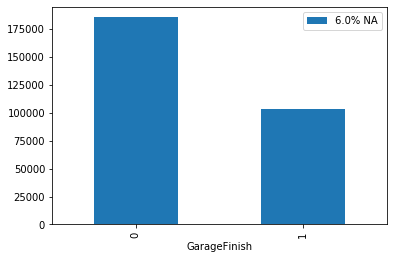

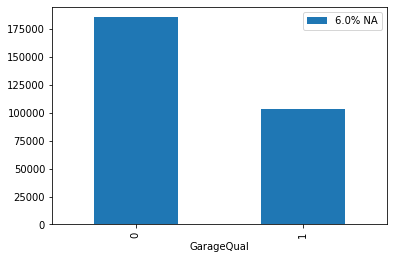

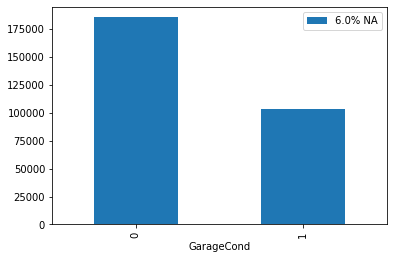

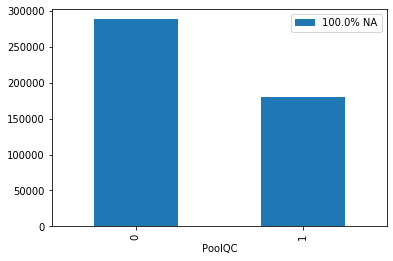

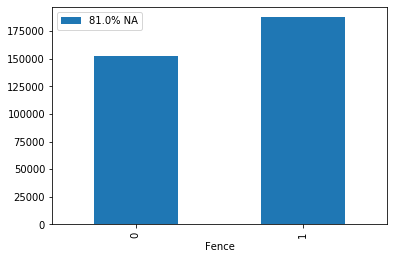

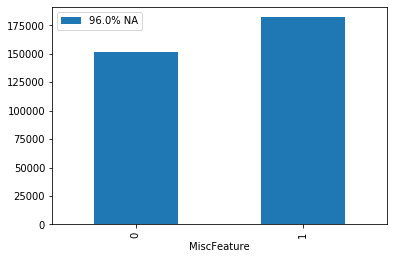

In [72]:
def analyse_na_value(df, var):

    df = df.copy()

    # Keep the percentage of missing values for the variable
    percent_na = round((df[var].isnull().sum()/len(df))*100)

    # Make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Compare the average SalePrice in the observations where data is missing
    # vs the observations where a value is available


    df.groupby(var)['SalePrice'].mean().plot(kind='bar', label=f'{percent_na}% NA')
    plt.legend(loc='best')

    plt.show()

vars_with_na = [var for var in data.columns if data[var].isnull().sum() >0]

for var in vars_with_na:
    plt.subplot()
    analyse_na_value(data, var)

The average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. 

In another notebook, we are going to deal with missing values for use in Machine Learning